# Import necessary libraries

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:

from pandas import  *
from numpy import *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,LSTM
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
df=read_csv('space_mining_dataset.csv')

In [4]:
df.head

<bound method NDFrame.head of        Celestial Body  Distance from Earth (M km)   Iron (%)  Nickel (%)  \
0              Europa                  642.933081  11.483867    1.994606   
1            Ganymede                  472.073374  15.689480   10.364329   
2                Mars                  849.155224   7.381894    1.740230   
3            Ganymede                  359.054825  25.820767   11.145742   
4            Ganymede                  777.456918   7.600523    7.908855   
...               ...                         ...        ...         ...   
999995           Mars                  433.887530  29.994169    6.606249   
999996         Europa                  486.804255  32.395148    9.579504   
999997           Mars                  678.528586  19.809052   12.583615   
999998       Asteroid                  254.908712  11.620250    3.779978   
999999           Moon                  700.513629  13.006732    7.158290   

        Water Ice (%)  Other Minerals (%)  Estimated Valu

In [5]:
# Check for missing values
print(df.isnull().sum())

Celestial Body                0
Distance from Earth (M km)    0
Iron (%)                      0
Nickel (%)                    0
Water Ice (%)                 0
Other Minerals (%)            0
Estimated Value (B USD)       0
Sustainability Index          0
Efficiency Index              0
Potential Mining Site         0
dtype: int64


In [6]:
df.describe()

,Distance from Earth (M km),Iron (%),Nickel (%),Water Ice (%),Other Minerals (%),Estimated Value (B USD),Sustainability Index,Efficiency Index
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,524.823192,22.496477,8.003163,14.996044,54.504316,55.900963,54.983909,64.996452
std,274.147968,10.105533,4.043015,8.660267,13.907402,13.891214,20.218724,20.203471
min,50.000359,5.000035,1.000019,0.000012,15.256663,14.905954,20.000024,30.000033
25%,287.659575,13.742728,4.503428,7.497026,44.559517,45.524667,37.470819,47.510534
50%,524.519692,22.499629,8.006217,14.983074,54.490893,55.903735,54.981937,64.990360
75%,762.253884,31.239831,11.500805,22.504273,64.459976,66.254729,72.526795,82.494809
max,999.999413,39.999926,14.999998,29.999918,93.541423,96.971740,89.999947,99.999907


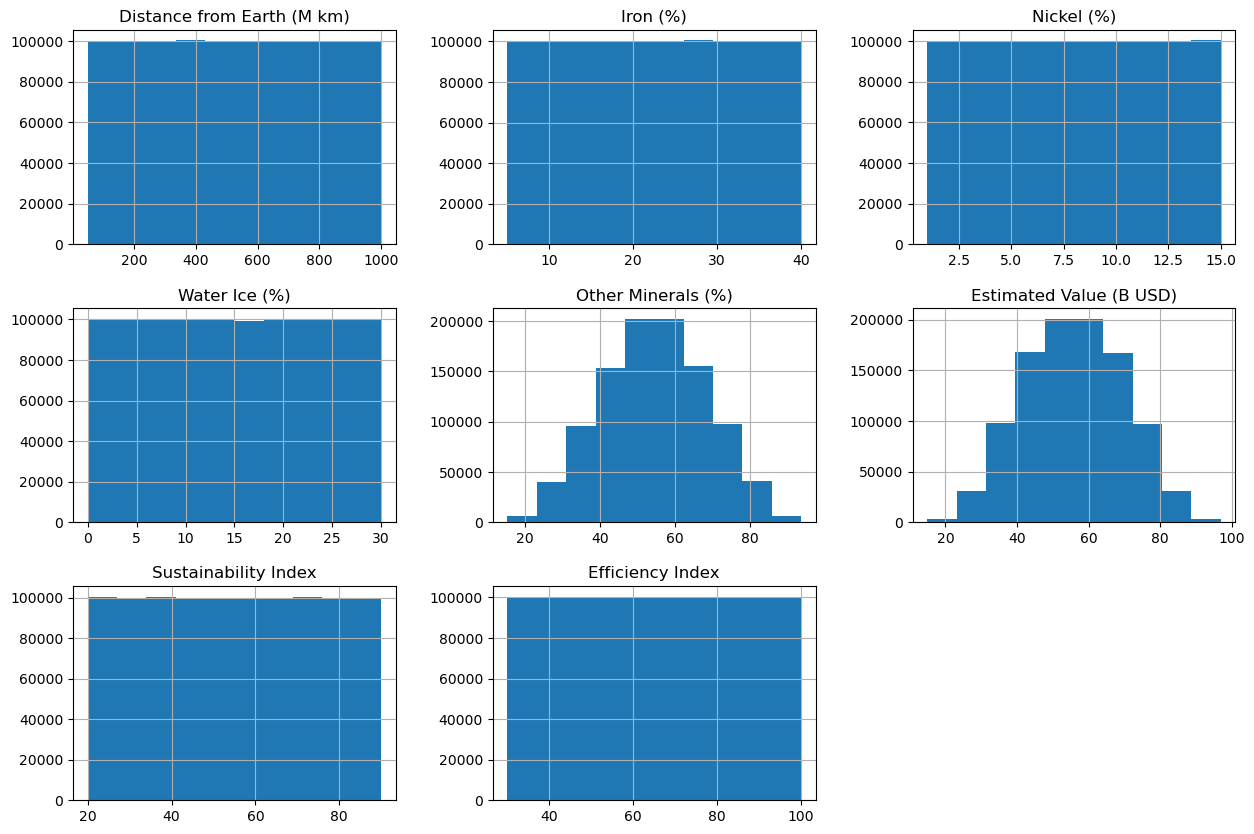

In [7]:

# Visualize the distribution of each numerical feature
df.hist(figsize=(15, 10))
show()


In [8]:
df.columns

Index(['Celestial Body', 'Distance from Earth (M km)', 'Iron (%)',
       'Nickel (%)', 'Water Ice (%)', 'Other Minerals (%)',
       'Estimated Value (B USD)', 'Sustainability Index', 'Efficiency Index',
       'Potential Mining Site'],
      dtype='object')

In [9]:
x=df.iloc[:,1:-1]

In [10]:
x.columns

Index(['Distance from Earth (M km)', 'Iron (%)', 'Nickel (%)', 'Water Ice (%)',
       'Other Minerals (%)', 'Estimated Value (B USD)', 'Sustainability Index',
       'Efficiency Index'],
      dtype='object')

In [11]:
y=df.iloc[:,-1:]

In [12]:
y

,Potential Mining Site
0,True
1,False
2,False
3,False
4,False
...,...
999995,False
999996,True
999997,False
999998,False


In [13]:
# Split df into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [14]:
'''from sklearn.ensemble import  RandomForestClassifier

# Initialize Random Forest classifier
r = RandomForestClassifier(n_estimators=5, random_state=1)

# Train the classifier
r.fit(x_train, y_train)
'''

'from sklearn.ensemble import  RandomForestClassifier\n\n# Initialize Random Forest classifier\nr = RandomForestClassifier(n_estimators=5, random_state=1)\n\n# Train the classifier\nr.fit(x_train, y_train)\n'

In [15]:
import joblib
#loading The models anywhere

r=joblib.load('RF_mining_model.pkl')

In [16]:

r.score(x_train,y_train)

0.99999875

In [17]:
r.score(x_test,y_test)

0.999995

In [18]:
input_data = DataFrame([[413.95896411015195, 12.031864299982333, 4.860503665226579, 16.003773827097444, 
                            67.10385820769365, 36.13170667717836, 70.128135040172, 98.46379316404845]],
                           columns=['Distance from Earth (M km)', 'Iron (%)', 'Nickel (%)', 
                                    'Water Ice (%)', 'Other Minerals (%)', 'Estimated Value (B USD)', 
                                    'Sustainability Index', 'Efficiency Index'])


prediction = r.predict(input_data)
print("Prediction:", prediction)

Prediction: [ True]


In [19]:
input_data = DataFrame([[262.8905503798111,6.388814509817609,1.3821046270023083,11.568467371683752,80.66061349149633,31.054831518801926,25.13901985443363,89.44942857312876]],
                           columns=['Distance from Earth (M km)', 'Iron (%)', 'Nickel (%)', 
                                    'Water Ice (%)', 'Other Minerals (%)', 'Estimated Value (B USD)', 
                                    'Sustainability Index', 'Efficiency Index'])


prediction = r.predict(input_data)
print("Prediction:", prediction)

Prediction: [False]


In [20]:
# Make predictions on the test set
y_pred = r.predict(x_test)

# Model evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))




Confusion Matrix:
 [[134668      0]
 [     1  65331]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    134668
        True       1.00      1.00      1.00     65332

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


Accuracy Score: 0.999995


# Explained

True Positives (TP): 65332

True Negatives (TN): 134668      

False Positives (FP): 0    # 0 error

False Negatives (FN): 1      

# save the model


In [21]:
'''import joblib
import os

# Specify a directory to save the model
save_dir = "C:\\imp\\1. ISRO"
os.makedirs(save_dir, exist_ok=True)

# Save the trained model in the specified directory
joblib.dump(r, os.path.join(save_dir, 'RF_mining_model.pkl'))
'''

'import joblib\nimport os\n\n# Specify a directory to save the model\nsave_dir = "C:\\imp\\1. ISRO"\nos.makedirs(save_dir, exist_ok=True)\n\n# Save the trained model in the specified directory\njoblib.dump(r, os.path.join(save_dir, \'RF_mining_model.pkl\'))\n'

In [22]:
'''from sklearn.ensemble import  GradientBoostingClassifier
g=GradientBoostingClassifier(n_estimators=10)'''

'from sklearn.ensemble import  GradientBoostingClassifier\ng=GradientBoostingClassifier(n_estimators=10)'

In [23]:
#g.fit(x_train, y_train)

In [24]:
'''#saving The Models
import joblib
joblib.dump(g,'FINAL_mining_model.pkl')
'''

"#saving The Models\nimport joblib\njoblib.dump(g,'FINAL_mining_model.pkl')\n"

In [25]:

#loading The models anywhere

g=joblib.load('FINAL_mining_model.pkl')

In [26]:

#loading The models anywhere

# g=joblib.load('GB_mining_model.pkl')

In [27]:
g.score(x_train, y_train)

1.0

In [28]:
g.score(x_test, y_test)

1.0

In [29]:
# Make predictions on the test set
y_pred = g.predict(x_test)

# Model evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))




Confusion Matrix:
 [[134668      0]
 [     0  65332]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    134668
        True       1.00      1.00      1.00     65332

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


Accuracy Score: 1.0


In [30]:
'''import joblib
import os

# Specify a directory to save the model
save_dir = "C:\\imp\\1. ISRO"
os.makedirs(save_dir, exist_ok=True)

# Save the trained model in the specified directory
joblib.dump(r, os.path.join(save_dir, 'GB_mining_model.pkl'))
'''

'import joblib\nimport os\n\n# Specify a directory to save the model\nsave_dir = "C:\\imp\\1. ISRO"\nos.makedirs(save_dir, exist_ok=True)\n\n# Save the trained model in the specified directory\njoblib.dump(r, os.path.join(save_dir, \'GB_mining_model.pkl\'))\n'

# STEPS TO `DEPLOY` A ML MODEL IN `Streamlit`

# 1. Create app.py or any name.py file in a folder, containing the following below code as an example w.r.t to a dataset :

Then `run` the file as `python` script

# ................................................................................................................................................................................................

`CODE`



import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("C:\\imp\\1. ISRO\\RF_mining_model.pkl")

# Title of the web app
st.title("Mining Site Prediction")

# Sidebar for user input
st.sidebar.header("Input Features")

def user_input_features():
    Distance_from_Earth = st.sidebar.slider("Distance from Earth (M km)", 1.0, 1000.0, 100.0)
    Iron = st.sidebar.slider("Iron (%)", 0.0, 100.0, 50.0)
    Nickel = st.sidebar.slider("Nickel (%)", 0.0, 100.0, 50.0)
    Water_Ice = st.sidebar.slider("Water Ice (%)", 0.0, 100.0, 50.0)
    Other_Minerals = st.sidebar.slider("Other Minerals (%)", 0.0, 100.0, 50.0)
    Estimated_Value = st.sidebar.slider("Estimated Value (B USD)", 0.0, 500.0, 100.0)
    Sustainability_Index = st.sidebar.slider("Sustainability Index", 0.0, 100.0, 0.5)
    Efficiency_Index = st.sidebar.slider("Efficiency Index", 0.0, 100.0, 0.5)

    data = {
        'Distance from Earth (M km)': Distance_from_Earth,
        'Iron (%)': Iron,
        'Nickel (%)': Nickel,
        'Water Ice (%)': Water_Ice,
        'Other Minerals (%)': Other_Minerals,
        'Estimated Value (B USD)': Estimated_Value,
        'Sustainability Index': Sustainability_Index,
        'Efficiency Index': Efficiency_Index
    }

    features = pd.DataFrame(data, index=[0])
    return features

# Get user input
input_df = user_input_features()

# Display user input
st.subheader('User Input Features')
st.write(input_df)

# Make prediction
prediction = model.predict(input_df)


# Display the prediction result
st.subheader('Prediction Result')

# Customize the prediction message
if prediction[0] == 1:
    st.success("✅ This is a **Potential Mining Site**.")
else:
    st.error("❌ This is **Not a Potential Mining Site**.")

# Optionally, you can add more details or a description below the result
st.markdown("""
<div style="margin-top: 20px; padding: 10px; border: 1px solid #ddd; border-radius: 5px;">
    <strong>Note:</strong> The prediction is based on the model's analysis of key features such as distance from Earth, mineral composition,estimated value(B USD) and sustainability indices.
</div>
""", unsafe_allow_html=True)


# ................................................................................................................................

# 2. Now, open cmd and give the following command

# cd 'path/to the folder/ where ur app.py is present'

AND `Not` the path of ur app.py `file`

# Run the command `streamlit run app.py `

OR `any name` given to `file`

# ................................................................................................................................

`   CODE`

C:\Users\debna>`cd "C:\imp\1. ISRO"`

C:\imp\1. ISRO>`streamlit run app.py`

You can now view your Streamlit app in your browser.

Local URL: http://localhost:8501
Network URL: http://192.168.118.96:8501

# ...........................................................................................................

# Now, lets deploy it permanently as `app`